In [165]:
import numpy as np
import pandas as pd
import pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Pandas II

### 1 Recap: creating Series and DataFrames

In [8]:
# a Series is a Pandas object containing a single array of data.
mySeries = pd.Series([10, 20, 30, 40])
mySeries

0    10
1    20
2    30
3    40
dtype: int64

In [12]:
# in more detail, a Series contains an array of values, plus an associated array of
# data labels, called its index

mySeries.values

array([10, 20, 30, 40])

In [14]:
# you can pass both the values and the index to the Series constructor
# Otherwise it will create an integer series of range(0, N-1) where N is the number of values you passed

mySeries = pd.Series(data = [10,20,30,40], index = ['a','b','c','d'])
mySeries

a    10
b    20
c    30
d    40
dtype: int64

In [174]:
# Create a dataframe from scratch several ways. A good one is to pass dictionaries containing
# the column name and the values.

goals_scored = pd.DataFrame({"Man Utd": [4, 2, 0, 2],
                         "Liverpool": [2, 3, 0, 5],
                          "Wrexham FC": [0, 0, 0, 0]})

goals_scored

,Man Utd,Liverpool,Wrexham FC
0,4,2,0
1,2,3,0
2,0,0,0
3,2,5,0


Check the [10-minutes to Pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html) tutorial for Pandas methods to create, inspect and analyze DataFrames.


In [177]:
print("Average goals this season:", goals_scored['Liverpool'].mean())

Average goals this season: 2.5


In [ ]:
# Pandas has useful built-in plotting via MatplotLib.

goals_scored.sum().plot(kind='barh')

#### 2. Unemployment data
*Objectives: Merge datasets, fill missing data through interpolation, use time series*

Credit: This section draws on an exercise developed by Geoff Boeing for his urban data science class

In [4]:
import pandas as pd
import numpy as np

In [14]:
# Load a dataset of Eurostat unemployment data 

unemployment = pd.read_csv('https://raw.githubusercontent.com/worldbank/Python-for-Data-Science/master/Spring%202019%208-week%20course/week%205/data/country_total.csv')

In [15]:
# Inspect with the .head() method

unemployment.head()

,country,seasonality,month,unemployment,unemployment_rate
0,at,nsa,1993.01,171000,4.5
1,at,nsa,1993.02,175000,4.6
2,at,nsa,1993.03,166000,4.4
3,at,nsa,1993.04,157000,4.1
4,at,nsa,1993.05,147000,3.9


In [16]:
# the .shape attribute gives a tuple with row and column numbers

unemployment.shape

(20796, 5)

You may notice that the month column actually shows the year and month. Let's rename it.

In [17]:
# Pass a dictionary to the .rename() method, specifying the column to rename (the dictionary key) and the new name to use (the dictionary value).

unemployment.rename(columns = {'month': 'year_month'}, inplace = True)

**Data munging**

This column is not easy to work with:

In [18]:
unemployment['year_month'].head()

0    1993.01
1    1993.02
2    1993.03
3    1993.04
4    1993.05
Name: year_month, dtype: float64

Let's separate year and month into their own columns:

In [27]:
# Step by step: first make the column contain strings

unemployment.year_month = unemployment.year_month.astype(str)

In [28]:
# Let's check what an example cell looks like

example_cell = unemployment.year_month[0]
example_cell

'1993.01'

In [29]:
# Remember the .split() method

example_cell.split('.')

['1993', '01']

In [50]:
# What is this code structure called? Practice it as homework.

[string.split('.')[0] for string in unemployment.year_month][:5]

['1993', '1993', '1993', '1993', '1993']

In [31]:
# Reassign to new column

unemployment['year'] = [string.split('.')[0] for string in unemployment.year_month]

In [32]:
unemployment['month'] = [string.split('.')[1] for string in unemployment.year_month]

It would be better to see the full names of the countries. Let's load another csv that has these.

In [33]:
countries_url = 'https://raw.githubusercontent.com/dlab-berkeley/introduction-to-pandas/master/data/countries.csv'
countries = pd.read_csv(countries_url)

In [34]:
countries.head()

,country,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
0,at,AT,eu,Austria,Autriche,Österreich,47.696554,13.345980
1,be,BE,eu,Belgium,Belgique,Belgien,50.501045,4.476674
2,bg,BG,eu,Bulgaria,Bulgarie,Bulgarien,42.725674,25.482322
3,hr,HR,non-eu,Croatia,Croatie,Kroatien,44.746643,15.340844
4,cy,CY,eu,Cyprus,Chypre,Zypern,35.129141,33.428682


**Merging dataframes**

Now, let's merge the two dfs, to get full country name and country_group.

In [35]:
country_names = countries[['country','name_en','country_group']]

In [36]:
unemployment = pd.merge(unemployment, country_names, on='country')

Check the full [documentation](http://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging) on merging.

**Unique values and value counts**

These are useful methods to understand how often different categories appear in your dataset. Here we see that some countries have 1000 unemployment readings for the period (presumably this means a measure each month with no gaps), which others have fewer data points.

In [37]:
# these options mean not seasonally adjusted, seasonally adjusted, trend cycle

unemployment.seasonality.unique()

array(['nsa', 'sa', 'trend'], dtype=object)

In [38]:
# .value_counts() return a Series containing unique values as its index and
# frequencies as its values, in descending order.

unemployment.name_en.value_counts()

Portugal                                     1008
Luxembourg                                   1008
Denmark                                      1008
Ireland                                      1008
France                                       1008
Sweden                                       1008
Spain                                        1008
Belgium                                      1008
Netherlands                                  1008
United Kingdom                               1002
Italy                                         924
Finland                                       828
Norway                                        786
Austria                                       648
Slovenia                                      576
Poland                                        576
Bulgaria                                      576
Malta                                         576
Slovakia                                      576
Hungary                                       576


**Summary statistics**

Pandas objects have a methods such as min, max, mean, median and std that produce summary statistics across a Series. Remember that these take parentheses.

The isnull() method is useful to count missing data.

In [39]:
print("Dataset runs from {} to {}".format(unemployment.year.min(), unemployment.year.max()))

Dataset runs from 1983 to 2010


In [40]:
# We see there are 945 observations with no unemployment rate recorded.
unemployment.isnull().sum()

country                0
seasonality            0
year_month             0
unemployment           0
unemployment_rate    945
year                   0
month                  0
name_en                0
country_group          0
dtype: int64

**View subsets of the data based on conditions**

You can subset the data using the syntax below.

For now, just learn and adapt this syntax. As homework, look up Boolean indexing in the McKinney book and see why this works.


In [41]:
unemployment[unemployment.name_en == 'Italy'].head(2)

,country,seasonality,year_month,unemployment,unemployment_rate,year,month,name_en,country_group
10197,it,nsa,1983.01,1592000,7.2,1983,01,Italy,eu
10198,it,nsa,1983.02,1629000,7.3,1983,02,Italy,eu


In [42]:
unemployment[unemployment.unemployment_rate < 10].head(2)

,country,seasonality,year_month,unemployment,unemployment_rate,year,month,name_en,country_group
0,at,nsa,1993.01,171000,4.5,1993,01,Austria,eu
1,at,nsa,1993.02,175000,4.6,1993,02,Austria,eu


**Drop or fill missing values**

It's not surprising that different statistical agencies collect unemployment stats at different frequencies. But to compare say Spain and Portugal, we may wish to fill the missing value gaps. Pandas has several options, a simple one being ffill (forward fill).

Let's look at two neighbors with high unemployment: Latvia and Lithuania

In [58]:
latvia = unemployment[(unemployment.name_en == 'Latvia') & (unemployment.seasonality == 'sa')]
lithuania = unemployment[(unemployment.name_en == 'Lithuania') & (unemployment.seasonality == 'sa')]

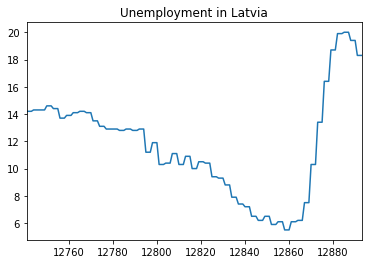

In [60]:
# Note: .plot() passes data to matplotlib. You can look up its parameters, eg. figsize.

latvia.unemployment_rate.plot()
plt.title("Unemployment in Latvia");

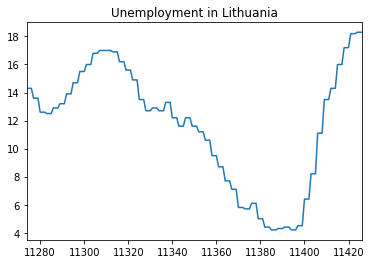

In [49]:
lithuania.unemployment_rate.plot()
plt.title("Unemployment in Lithuania");